In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# provides access to datasets from the UCI Machine Learning Repository.
!pip install ucimlrepo

In [ ]:
# fetch the Breast Cancer Wisconsin (Diagnostic) dataset from the UCI
from ucimlrepo import fetch_ucirepo
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
diagnosis_map = {'M': 1, 'B': 0}
y=y.replace(diagnosis_map)

In [ ]:
X['Diagnosis']=y

<ipython-input-22-96cd5180cd4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Diagnosis']=y


In [ ]:
# DataFrame for features ending with '_mean'
mean_columns = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1','Diagnosis']
group1 = X[mean_columns].copy()
group1.columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                   'smoothness_mean', 'compactness_mean', 'concavity_mean','Diagnosis']

# DataFrame for features ending with '_worst'
worst1_columns =  ['radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3','Diagnosis']
group2 = X[worst1_columns].copy()
group2.columns = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                    'smoothness_worst','Diagnosis']
worst2_columns =  ['compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3','Diagnosis']
group3 = X[worst2_columns].copy()
group3.columns = [ 'compactness_worst', 'concavity_worst',
                    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst','Diagnosis']


In [ ]:
# Rename columns
rename_dict = {
    'radius1': 'radius_mean',
    'texture1': 'texture_mean',
    'perimeter1': 'perimeter_mean',
    'area1': 'area_mean',
    'smoothness1': 'smoothness_mean',
    'compactness1': 'compactness_mean',
    'concavity1': 'concavity_mean',
    'concave_points1': 'concave_points_mean',
    'symmetry1': 'symmetry_mean',
    'fractal_dimension1': 'fractal_dimension_mean',
    'radius2': 'radius_se',
    'texture2': 'texture_se',
    'perimeter2': 'perimeter_se',
    'area2': 'area_se',
    'smoothness2': 'smoothness_se',
    'compactness2': 'compactness_se',
    'concavity2': 'concavity_se',
    'concave_points2': 'concave_points_se',
    'symmetry2': 'symmetry_se',
    'fractal_dimension2': 'fractal_dimension_se',
    'radius3': 'radius_worst',
    'texture3': 'texture_worst',
    'perimeter3': 'perimeter_worst',
    'area3': 'area_worst',
    'smoothness3': 'smoothness_worst',
    'compactness3': 'compactness_worst',
    'concavity3': 'concavity_worst',
    'concave_points3': 'concave_points_worst',
    'symmetry3': 'symmetry_worst',
    'fractal_dimension3': 'fractal_dimension_worst',
    'Diagnosis': 'Diagnosis'
}

# Rename columns in each DataFrame
X.rename(columns=rename_dict, inplace=True)


<ipython-input-24-2794cb1f2307>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns=rename_dict, inplace=True)


In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# once use pca,lca,fa

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.utils import resample
import numpy as np
import pandas as pd

# Impute missing values with the median (second quartile)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Detect and handle outliers
z_scores = np.abs((data_imputed - data_imputed.mean()) / data_imputed.std())
# Identify outliers (Z-score > 3)
outliers = (z_scores > 3)

# Replace outliers with the median of the respective column
for column in data_imputed.columns:
    median = data_imputed[column].median()
    data_imputed.loc[outliers[column], column] = median
data_no_outliers=data_imputed
X = data_no_outliers.drop(columns=['Diagnosis'])
y = data_no_outliers['Diagnosis']
# Standardize the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Adjust the number of components as needed
tsne_features = tsne.fit_transform(data_scaled)
# PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
pca_features = pca.fit_transform(data_scaled)

# Assuming you have already defined the number of components required to retain 95% variance
n_components = 10  # Adjust as needed

# Perform Factor Analysis
fa = FactorAnalysis(n_components=n_components)#pca_features.shape[1]
fa.fit(data_scaled)

# Get the transformed features
fa_features = fa.transform(data_scaled)



In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.09263,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.09587,0.09263,0.24140,0.10520,0.2597,0.06154,...,14.910,26.50,98.87,567.7,0.13130,0.21190,0.6869,0.2575,0.2822,0.08004
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.09263,0.06154,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.21190,0.2267,0.2650,0.4087,0.12400


In [ ]:
# LDA - Assuming target column is named 'target'
lda = LDA(n_components=1)  # C-1 where C is the number of classes
lda_features = lda.fit_transform(data_scaled, y )

# Combine extracted features
combined_features = np.hstack((pca_features, fa_features, lda_features,tsne_features))
# Combine into a single DataFrame
combined_data = pd.DataFrame(combined_features)
x=pd.DataFrame(combined_features)
combined_data['target'] = y

# Separate majority and minority classes
majority_class = combined_data[combined_data['target'] == 0]
minority_class = combined_data[combined_data['target'] == 1]



In [ ]:
combined_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,target
0,9.902119,1.792946,-1.239461,3.718658,-2.181995,1.975449,-2.833604,0.580479,-0.883218,0.563573,...,-2.576806,-0.965664,2.133139,-0.178496,-0.647261,-1.139705,4.744819,32.654469,-6.106389,1.0
1,2.999562,-4.211371,-0.741489,1.085989,-0.175591,-0.044619,-0.530865,-1.345389,0.123187,1.260268,...,-0.520549,0.221283,-0.009824,-0.175105,1.342098,0.311243,2.162657,16.175154,-12.414171,1.0
2,6.752568,-1.048076,-0.407650,1.038237,-0.625911,0.727882,0.355117,-0.249796,-0.110780,-0.370566,...,0.109356,-0.710974,0.333885,0.747754,-0.470710,0.377440,4.038182,25.759676,-7.951856,1.0
3,3.172226,3.550833,0.928499,0.371252,1.935539,0.935415,1.526873,0.850598,-0.466102,1.627220,...,0.856923,1.917368,0.720383,2.136842,-2.482210,0.482400,2.182587,19.632410,11.125799,1.0
4,4.858419,-1.938251,0.976043,3.639314,0.167140,-1.493404,0.485559,-1.033818,-0.456352,0.328732,...,1.132308,-0.150106,-1.252921,0.147015,0.668888,-0.156145,2.310819,22.807310,-11.942149,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,7.812078,-3.701073,3.018719,2.277033,-0.328294,-2.815558,-0.248934,0.585849,-0.473217,-0.047198,...,0.736674,0.261467,-2.110996,0.040761,-1.047869,0.518871,4.810930,29.284431,-12.515387,1.0
565,4.621346,-3.781863,3.613399,-1.675998,-0.478800,-0.398475,0.499328,0.505738,0.951583,0.415562,...,0.683402,-0.002126,-0.537122,1.064490,-0.030420,0.016668,3.205457,22.195681,-15.985579,1.0
566,1.839362,-2.014892,1.204450,-1.743175,2.255476,-0.462231,0.013712,-0.088945,-0.421604,-0.257705,...,1.152469,1.367403,0.169155,-0.697683,0.104777,0.482035,1.066386,8.280739,-10.234341,1.0
567,8.192924,0.431102,1.245925,-1.857196,-1.761031,0.907384,-0.982725,-1.528142,0.616000,1.553601,...,-0.213881,-1.399243,-0.098875,1.377997,2.270200,-0.677705,3.314767,27.557739,-5.558438,1.0


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split 50% of the train data as unlabeled data for semi-supervised learning
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train, train_size=0.5, stratify=y_train, random_state=42)

# Ensure y_labeled is 1D
y_labeled = y_labeled.ravel()

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear SVM': LinearSVC(max_iter=10000),
    'RBF SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

# Define hyperparameters grid for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Gaussian Naive Bayes': {},  # No hyperparameters for Gaussian Naive Bayes
    'Linear SVM': {'C': [0.1, 1, 10]},
    'RBF SVM': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'Decision Tree': {'max_depth': [None, 5, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]},
    'XGBoost': {
        'n_estimators': [50, 100],  # Reduced the number of estimators
        'max_depth': [3, 5],
        'learning_rate': [0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1]
    },
    'Gradient Boosting': {'n_estimators': [50, 100], 'max_depth': [3, 5]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
}

# Initialize KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to print metrics
def print_metrics(model_name, y_true, y_pred, context="SL"):
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    accuracy = accuracy_score(y_true, y_pred)
    avg_precision = precision_score(y_true, y_pred, average='macro')
    avg_recall = recall_score(y_true, y_pred, average='macro')
    avg_f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Model: {model_name} ({context})")
    print(f"Malignant Precision: {precision[0]:.2%} | Recall: {recall[0]:.2%} | F1-Score: {f1[0]:.2%}")
    print(f"Benign Precision: {precision[1]:.2%} | Recall: {recall[1]:.2%} | F1-Score: {f1[1]:.2%}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Avg Precision: {avg_precision:.2%} | Avg Recall: {avg_recall:.2%} | Avg F1-Score: {avg_f1:.2%}")
    print("----------------------------------------------")

# Perform grid search and print metrics for each model in a supervised learning setting
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    print_metrics(model_name, y_test, y_pred, context="SL")

# Voting Classifier for ensemble
voting_clf = VotingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier())
], voting='soft', n_jobs=-1)  # Added n_jobs=-1 for parallel processing

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print_metrics('Voting Classifier', y_test, y_pred)

# Semi-Supervised Learning loop
for model_name, model in models.items():
    param_grid = param_grids[model_name]  # Retrieve the parameter grid for the current model

    for iteration in range(5):  # Perform 5 iterations
        # Perform grid search CV on the current labeled data
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_labeled, y_labeled)  # Fit the model using labeled data

        # Predict labels for the unlabeled data using the best model
        if len(X_unlabeled) > 0:  # Check if X_unlabeled is not empty
            y_unlabeled_pred = grid_search.best_estimator_.predict(X_unlabeled)
            mask = (y_unlabeled_pred != -1)  # Create a mask for confident predictions

            if mask.sum() == 0:
                break  # No new confident predictions, stop the loop

            # Ensure y_unlabeled_pred[mask] is 1D
            y_unlabeled_pred = y_unlabeled_pred[mask].ravel()

            # Add confidently predicted unlabeled data to the labeled set
            X_labeled = np.concatenate((X_labeled, X_unlabeled[mask]), axis=0)
            y_labeled = np.concatenate((y_labeled, y_unlabeled_pred), axis=0)

            # Remove confidently predicted data from the unlabeled set
            X_unlabeled = X_unlabeled[~mask]
            y_unlabeled = y_unlabeled[~mask]
        else:
            break  # X_unlabeled is empty, exit the loop

    # Predict on test data using the final best estimator
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Print metrics
    print_metrics(model_name, y_test, y_pred, context="SSL")


Model: Logistic Regression (SL)
Malignant Precision: 98.57% | Recall: 97.18% | F1-Score: 97.87%
Benign Precision: 95.45% | Recall: 97.67% | F1-Score: 96.55%
Accuracy: 97.37%
Avg Precision: 97.01% | Avg Recall: 97.43% | Avg F1-Score: 97.21%
----------------------------------------------
Model: Gaussian Naive Bayes (SL)
Malignant Precision: 95.83% | Recall: 97.18% | F1-Score: 96.50%
Benign Precision: 95.24% | Recall: 93.02% | F1-Score: 94.12%
Accuracy: 95.61%
Avg Precision: 95.54% | Avg Recall: 95.10% | Avg F1-Score: 95.31%
----------------------------------------------
Model: Linear SVM (SL)
Malignant Precision: 97.22% | Recall: 98.59% | F1-Score: 97.90%
Benign Precision: 97.62% | Recall: 95.35% | F1-Score: 96.47%
Accuracy: 97.37%
Avg Precision: 97.42% | Avg Recall: 96.97% | Avg F1-Score: 97.19%
----------------------------------------------
Model: RBF SVM (SL)
Malignant Precision: 97.14% | Recall: 95.77% | F1-Score: 96.45%
Benign Precision: 93.18% | Recall: 95.35% | F1-Score: 94.25%
Ac

In [ ]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear SVM': LinearSVC(max_iter=10000),
    'RBF SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

# Define hyperparameters grid for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Gaussian Naive Bayes': {},  # No hyperparameters for Gaussian Naive Bayes
    'Linear SVM': {'C': [0.1, 1, 10]},
    'RBF SVM': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'Decision Tree': {'max_depth': [None, 5, 10, 20]},
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'XGBoost': {
        'n_estimators': [50, 100],  # Reduced the number of estimators
        'max_depth': [3, 5],
        'learning_rate': [0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1]
    },
    'Gradient Boosting': {'n_estimators': [50, 100], 'max_depth': [3, 5]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
}

# Initialize KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to print metrics
def print_metrics(model_name, y_true, y_pred, context="SL"):
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    accuracy = accuracy_score(y_true, y_pred)
    avg_precision = precision_score(y_true, y_pred, average='macro')
    avg_recall = recall_score(y_true, y_pred, average='macro')
    avg_f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Model: {model_name} ({context})")
    print(f"Malignant Precision: {precision[0]:.2%} | Recall: {recall[0]:.2%} | F1-Score: {f1[0]:.2%}")
    print(f"Benign Precision: {precision[1]:.2%} | Recall: {recall[1]:.2%} | F1-Score: {f1[1]:.2%}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Avg Precision: {avg_precision:.2%} | Avg Recall: {avg_recall:.2%} | Avg F1-Score: {avg_f1:.2%}")
    print("----------------------------------------------")

# Perform grid search and print metrics for each model in a supervised learning setting
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    print_metrics(model_name, y_test, y_pred, context="SL")

# Voting Classifier for ensemble
voting_clf = VotingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier())
], voting='soft', n_jobs=-1)  # Added n_jobs=-1 for parallel processing

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print_metrics('Voting Classifier', y_test, y_pred)

# Semi-Supervised Learning loop
for model_name, model in models.items():
    param_grid = param_grids[model_name]  # Retrieve the parameter grid for the current model

    for iteration in range(5):  # Perform 5 iterations
        # Perform grid search CV on the current labeled data
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_labeled, y_labeled)  # Fit the model using labeled data

        # Predict labels for the unlabeled data using the best model
        if len(X_unlabeled) > 0:  # Check if X_unlabeled is not empty
            y_unlabeled_prob = grid_search.best_estimator_.predict_proba(X_unlabeled)
            confidence_threshold = 0.9  # Confidence threshold for pseudo-labeling
            mask = np.max(y_unlabeled_prob, axis=1) > confidence_threshold
            y_unlabeled_pred = np.argmax(y_unlabeled_prob[mask], axis=1)
            if mask.sum() == 0:
                break  # No new confident predictions, stop the loop

            # Ensure y_unlabeled_pred[mask] is 1D
            y_unlabeled_pred = y_unlabeled_pred.ravel()

            # Add confidently predicted unlabeled data to the labeled set
            X_labeled = np.concatenate((X_labeled, X_unlabeled[mask]), axis=0)
            y_labeled = np.concatenate((y_labeled, y_unlabeled_pred), axis=0)

            # Remove confidently predicted data from the unlabeled set
            X_unlabeled = X_unlabeled[~mask]
            y_unlabeled = y_unlabeled[~mask]
        else:
            break  # X_unlabeled is empty, exit the loop

    # Predict on test data using the final best estimator
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Print metrics
    print_metrics(model_name, y_test, y_pred, context="SSL")

# Bagging Classifier for ensemble
bagging_clf = BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print_metrics('Bagging Classifier', y_test, y_pred)

Model: Logistic Regression (SL)
Malignant Precision: 98.57% | Recall: 97.18% | F1-Score: 97.87%
Benign Precision: 95.45% | Recall: 97.67% | F1-Score: 96.55%
Accuracy: 97.37%
Avg Precision: 97.01% | Avg Recall: 97.43% | Avg F1-Score: 97.21%
----------------------------------------------
Model: Gaussian Naive Bayes (SL)
Malignant Precision: 95.83% | Recall: 97.18% | F1-Score: 96.50%
Benign Precision: 95.24% | Recall: 93.02% | F1-Score: 94.12%
Accuracy: 95.61%
Avg Precision: 95.54% | Avg Recall: 95.10% | Avg F1-Score: 95.31%
----------------------------------------------
Model: Linear SVM (SL)
Malignant Precision: 97.22% | Recall: 98.59% | F1-Score: 97.90%
Benign Precision: 97.62% | Recall: 95.35% | F1-Score: 96.47%
Accuracy: 97.37%
Avg Precision: 97.42% | Avg Recall: 96.97% | Avg F1-Score: 97.19%
----------------------------------------------
Model: RBF SVM (SL)
Malignant Precision: 97.14% | Recall: 95.77% | F1-Score: 96.45%
Benign Precision: 93.18% | Recall: 95.35% | F1-Score: 94.25%
Ac

KeyboardInterrupt: 

In [ ]:
import contextlib
import random
import os
import time
import datetime
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Placeholder for AdaIN import if needed
# from .adain import AdaIN  # Assuming you have AdaIN implemented

@contextlib.contextmanager
def freeze_models_params(models):
    try:
        for model in models:
            model.trainable = False
        yield
    finally:
        for model in models:
            model.trainable = True

class StochasticClassifier(tf.keras.Model):
    def __init__(self, num_features, num_classes, temp=0.05):
        super(StochasticClassifier, self).__init__()
        self.mu = self.add_weight(name='mu', shape=(num_classes, num_features),
                                  initializer=tf.random_normal_initializer(stddev=0.01))
        self.sigma = self.add_weight(name='sigma', shape=(num_classes, num_features),
                                     initializer='zeros')
        self.temp = temp

    def call(self, x, stochastic=True):
        mu = self.mu
        sigma = self.sigma

        if stochastic:
            sigma = tf.nn.softplus(sigma - 4)
            weight = sigma * tf.random.normal(tf.shape(mu)) + mu
        else:
            weight = mu

        weight = tf.nn.l2_normalize(weight, axis=1)
        x = tf.nn.l2_normalize(x, axis=1)

        score = tf.matmul(x, weight, transpose_b=True)
        score = score / self.temp

        return score

class NormalClassifier(tf.keras.Model):
    def __init__(self, num_features, num_classes):
        super(NormalClassifier, self).__init__()
        self.linear = Dense(num_classes)

    def call(self, x, stochastic=True):
        return self.linear(x)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(X.drop(columns=['Diagnosis']))

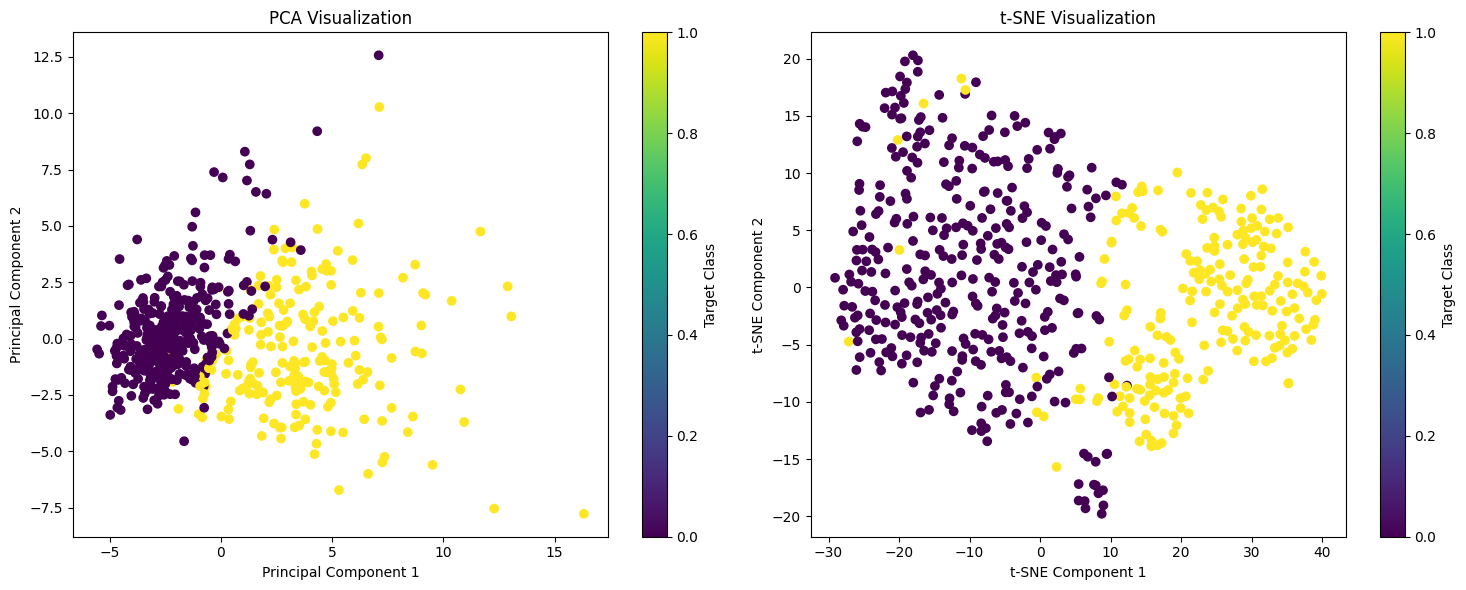

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(scaled_data)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_data)

# Visualize the results
plt.figure(figsize=(15, 6))

# Plot PCA visualization
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['Diagnosis'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target Class')

# Plot t-SNE visualization
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X['Diagnosis'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar(label='Target Class')

plt.tight_layout()
plt.show()


In [ ]:
# normalizing the data for KNN
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
norm_train=scaler.fit_transform(X_tsne)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
X1_train,X1_test,y1_train,y1_test=train_test_split(norm_train,y,test_size=0.2,random_state=42)

In [ ]:
# Assuming X1_train, y1_train, and X1_test, y1_test are already defined

# Normalize the features
scaler = StandardScaler()
norm_train = scaler.fit_transform(X1_train)
norm_test = scaler.transform(X1_test)

# Split 50% of the train data as unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(norm_train, y1_train, train_size=0.5, stratify=y1_train, random_state=42)

# Ensure y_labeled is 1D
y_labeled = y_labeled.to_numpy().ravel() if hasattr(y_labeled, 'to_numpy') else y_labeled.ravel()


In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear SVM': LinearSVC(max_iter=10000),
    'RBF SVM': SVC(probability=True),  # Enable probability estimates
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Stochastic Classifier': StochasticClassifier(norm_train.shape[1], len(np.unique(y1_train))),
    'Normal Classifier': NormalClassifier(norm_train.shape[1], len(np.unique(y1_train)))
}

# Define hyperparameters grid for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Gaussian Naive Bayes': {},  # No hyperparameters for Gaussian Naive Bayes
    'Linear SVM': {'C': [0.1, 1, 10]},
    'RBF SVM': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'Decision Tree': {'max_depth': [None, 5, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]},
    'KNN': {'n_neighbors': [3, 5, 10]},
    'Stochastic Classifier': {},  # Add grid search parameters if any
    'Normal Classifier': {}       # Add grid search parameters if any
}


In [ ]:
# Initialize KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to print metrics
def print_metrics(model_name, y_true, y_pred):
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    accuracy = accuracy_score(y_true, y_pred)
    avg_precision = precision_score(y_true, y_pred, average='macro')
    avg_recall = recall_score(y_true, y_pred, average='macro')
    avg_f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Model: {model_name}")
    print(f"Malignant Precision: {precision[0]:.2%} | Recall: {recall[0]:.2%} | F1-Score: {f1[0]:.2%}")
    print(f"Benign Precision: {precision[1]:.2%} | Recall: {recall[1]:.2%} | F1-Score: {f1[1]:.2%}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Avg Precision: {avg_precision:.2%} | Avg Recall: {avg_recall:.2%} | Avg F1-Score: {avg_f1:.2%}")
    print("----------------------------------------------")

# Semi-Supervised Learning loop
for model_name, model in models.items():
    param_grid = param_grids[model_name]  # Retrieve the parameter grid for the current model

    for iteration in range(5):  # Perform 5 iterations
        if isinstance(model, (StochasticClassifier, NormalClassifier)):
            # Custom training loop for StochasticClassifier and NormalClassifier
            model.compile(optimizer=optimizers.Adam(), loss=losses.SparseCategoricalCrossentropy(from_logits=True))
            model.fit(X_labeled, y_labeled, epochs=10, batch_size=32, validation_split=0.1)

            # Predict labels for the unlabeled data
            if len(X_unlabeled) > 0:
                y_unlabeled_pred = tf.argmax(model.predict(X_unlabeled), axis=1).numpy()
                mask = (y_unlabeled_pred != -1)  # Create a mask for confident predictions

                if mask.sum() == 0:
                    break  # No new confident predictions, stop the loop

                y_unlabeled_pred = y_unlabeled_pred[mask].ravel()
                X_labeled = np.concatenate((X_labeled, X_unlabeled[mask]), axis=0)
                y_labeled = np.concatenate((y_labeled, y_unlabeled_pred), axis=0)
                X_unlabeled = X_unlabeled[~mask]
                y_unlabeled = y_unlabeled[~mask]
            else:
                break
        else:
            # Grid search CV for sklearn models
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
            grid_search.fit(X_labeled, y_labeled)  # Fit the model using labeled data

            if len(X_unlabeled) > 0:
                y_unlabeled_pred = grid_search.best_estimator_.predict(X_unlabeled)
                mask = (y_unlabeled_pred != -1)

                if mask.sum() == 0:
                    break  # No new confident predictions, stop the loop

                y_unlabeled_pred = y_unlabeled_pred[mask].ravel()
                X_labeled = np.concatenate((X_labeled, X_unlabeled[mask]), axis=0)
                y_labeled = np.concatenate((y_labeled, y_unlabeled_pred), axis=0)
                X_unlabeled = X_unlabeled[~mask]
                y_unlabeled = y_unlabeled[~mask]
            else:
                break

    # Predict on test data using the final best estimator
    if isinstance(model, (StochasticClassifier, NormalClassifier)):
        y_pred = tf.argmax(model.predict(norm_test), axis=1).numpy()
    else:
        y_pred = grid_search.best_estimator_.predict(norm_test)

    # Print metrics
    print_metrics(model_name, y1_test, y_pred)


Model: Logistic Regression
Malignant Precision: 95.83% | Recall: 97.18% | F1-Score: 96.50%
Benign Precision: 95.24% | Recall: 93.02% | F1-Score: 94.12%
Accuracy: 95.61%
Avg Precision: 95.54% | Avg Recall: 95.10% | Avg F1-Score: 95.31%
----------------------------------------------
Model: Gaussian Naive Bayes
Malignant Precision: 97.18% | Recall: 97.18% | F1-Score: 97.18%
Benign Precision: 95.35% | Recall: 95.35% | F1-Score: 95.35%
Accuracy: 96.49%
Avg Precision: 96.27% | Avg Recall: 96.27% | Avg F1-Score: 96.27%
----------------------------------------------
Model: Linear SVM
Malignant Precision: 97.18% | Recall: 97.18% | F1-Score: 97.18%
Benign Precision: 95.35% | Recall: 95.35% | F1-Score: 95.35%
Accuracy: 96.49%
Avg Precision: 96.27% | Avg Recall: 96.27% | Avg F1-Score: 96.27%
----------------------------------------------
Model: RBF SVM
Malignant Precision: 95.83% | Recall: 97.18% | F1-Score: 96.50%
Benign Precision: 95.24% | Recall: 93.02% | F1-Score: 94.12%
Accuracy: 95.61%
Avg P

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers, losses

# Assuming norm_train and norm_test are already defined

class ImprovedStochasticClassifier(tf.keras.Model):
    def __init__(self, num_features, num_classes, temp=0.05):
        super(ImprovedStochasticClassifier, self).__init__()
        self.mu = self.add_weight(name='mu', shape=(num_classes, num_features),
                                  initializer=tf.random_normal_initializer(stddev=0.01))
        self.sigma = self.add_weight(name='sigma', shape=(num_classes, num_features),
                                     initializer='zeros')
        self.temp = temp
        self.dropout = tf.keras.layers.Dropout(0.5)

    def call(self, x, stochastic=True):
        x = self.dropout(x)
        mu = self.mu
        sigma = self.sigma

        if stochastic:
            sigma = tf.nn.softplus(sigma - 4)
            weight = sigma * tf.random.normal(tf.shape(mu)) + mu
        else:
            weight = mu

        weight = tf.nn.l2_normalize(weight, axis=1)
        x = tf.nn.l2_normalize(x, axis=1)

        score = tf.matmul(x, weight, transpose_b=True)
        score = score / self.temp

        return score

class ImprovedNormalClassifier(tf.keras.Model):
    def __init__(self, num_features, num_classes):
        super(ImprovedNormalClassifier, self).__init__()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.output_layer = Dense(num_classes)

    def call(self, x, stochastic=True):
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense2(x)
        x = self.dropout(x)
        return self.output_layer(x)

# Initialize models
tf_models = {
    'Improved Stochastic Classifier': ImprovedStochasticClassifier(norm_train.shape[1], len(np.unique(y1_train))),
    'Improved Normal Classifier': ImprovedNormalClassifier(norm_train.shape[1], len(np.unique(y1_train)))
}

# Training and evaluation for TensorFlow models
for model_name, model in tf_models.items():
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True))

    for iteration in range(5):  # Perform 5 iterations
        # Train the model on labeled data
        model.fit(X_labeled, y_labeled, epochs=20, batch_size=16, validation_split=0.1)

        # Predict labels for the unlabeled data
        if len(X_unlabeled) > 0:
            y_unlabeled_pred = tf.argmax(model.predict(X_unlabeled), axis=1).numpy()
            mask = (y_unlabeled_pred != -1)  # Create a mask for confident predictions

            if mask.sum() == 0:
                break  # No new confident predictions, stop the loop

            # Ensure y_unlabeled_pred[mask] is 1D
            y_unlabeled_pred = y_unlabeled_pred[mask].ravel()

            # Add confidently predicted unlabeled data to the labeled set
            X_labeled = np.concatenate((X_labeled, X_unlabeled[mask]), axis=0)
            y_labeled = np.concatenate((y_labeled, y_unlabeled_pred), axis=0)

            # Remove confidently predicted data from the unlabeled set
            X_unlabeled = X_unlabeled[~mask]
            y_unlabeled = y_unlabeled[~mask]
        else:
            break  # X_unlabeled is empty, exit the loop

    # Predict on test data
    y_pred = tf.argmax(model.predict(norm_test), axis=1).numpy()

    # Print metrics
    print_metrics(model_name, y1_test, y_pred)


Epoch 1/20
26/26 [==============================] - 2s 19ms/step - loss: 5.5924 - val_loss: 6.4022
Epoch 2/20
26/26 [==============================] - 0s 8ms/step - loss: 3.5441 - val_loss: 2.9465
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 2.4237 - val_loss: 4.0035
Epoch 4/20
26/26 [==============================] - 0s 7ms/step - loss: 3.1226 - val_loss: 1.2186
Epoch 5/20
26/26 [==============================] - 0s 7ms/step - loss: 2.5492 - val_loss: 1.3695
Epoch 6/20
26/26 [==============================] - 0s 8ms/step - loss: 2.6019 - val_loss: 1.2022
Epoch 7/20
26/26 [==============================] - 0s 6ms/step - loss: 2.2004 - val_loss: 1.4133
Epoch 8/20
26/26 [==============================] - 0s 6ms/step - loss: 1.8177 - val_loss: 0.7617
Epoch 9/20
26/26 [==============================] - 0s 7ms/step - loss: 2.0675 - val_loss: 1.1269
Epoch 10/20
26/26 [==============================] - 0s 8ms/step - loss: 2.1069 - val_loss: 0.6161
Epoch 11/20
26/26 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X1_train, y1_train, and X1_test, y1_test are already defined

# Normalize the features
scaler = StandardScaler()
norm_train = scaler.fit_transform(X1_train)
norm_test = scaler.transform(X1_test)

# Split 50% of the train data as unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(norm_train, y1_train, train_size=0.5, stratify=y1_train, random_state=42)

# Ensure y_labeled is 1D
y_labeled = y_labeled.values.ravel()

class ImprovedStochasticClassifier(tf.keras.Model):
    def __init__(self, num_features, num_classes, temp=0.05):
        super(ImprovedStochasticClassifier, self).__init__()
        self.mu = self.add_weight(name='mu', shape=(num_classes, num_features),
                                  initializer=tf.random_normal_initializer(stddev=0.01))
        self.sigma = self.add_weight(name='sigma', shape=(num_classes, num_features),
                                     initializer='zeros')
        self.temp = temp
        self.dropout = tf.keras.layers.Dropout(0.5)

    def call(self, x, stochastic=True):
        x = self.dropout(x)
        mu = self.mu
        sigma = self.sigma

        if stochastic:
            sigma = tf.nn.softplus(sigma - 4)
            weight = sigma * tf.random.normal(tf.shape(mu)) + mu
        else:
            weight = mu

        weight = tf.nn.l2_normalize(weight, axis=1)
        x = tf.nn.l2_normalize(x, axis=1)

        score = tf.matmul(x, weight, transpose_b=True)
        score = score / self.temp

        return score

class ImprovedNormalClassifier(tf.keras.Model):
    def __init__(self, num_features, num_classes):
        super(ImprovedNormalClassifier, self).__init__()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.output_layer = Dense(num_classes)

    def call(self, x, stochastic=True):
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense2(x)
        x = self.dropout(x)
        return self.output_layer(x)

# Initialize models
tf_models = {
    'Improved Stochastic Classifier': ImprovedStochasticClassifier(norm_train.shape[1], len(np.unique(y1_train))),
    'Improved Normal Classifier': ImprovedNormalClassifier(norm_train.shape[1], len(np.unique(y1_train)))
}

# Function to print metrics
def print_metrics(model_name, y_true, y_pred):
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    accuracy = accuracy_score(y_true, y_pred)
    avg_precision = precision_score(y_true, y_pred, average='macro')
    avg_recall = recall_score(y_true, y_pred, average='macro')
    avg_f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Model: {model_name}")
    print(f"Malignant Precision: {precision[0]:.2%} | Recall: {recall[0]:.2%} | F1-Score: {f1[0]:.2%}")
    print(f"Benign Precision: {precision[1]:.2%} | Recall: {recall[1]:.2%} | F1-Score: {f1[1]:.2%}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Avg Precision: {avg_precision:.2%} | Avg Recall: {avg_recall:.2%} | Avg F1-Score: {avg_f1:.2%}")
    print("----------------------------------------------")

# Training and evaluation for TensorFlow models
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in tf_models.items():
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True))

    best_val_loss = float("inf")
    best_model = None

    for train_idx, val_idx in kfold.split(X_labeled, y_labeled):
        X_train, X_val = X_labeled[train_idx], X_labeled[val_idx]
        y_train, y_val = y_labeled[train_idx], y_labeled[val_idx]

        # Early stopping and model checkpointing
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(f'best_model_{model_name}.h5', save_best_only=True, monitor='val_loss')

        for iteration in range(5):  # Perform 5 iterations
            # Train the model on labeled data
            model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val),
                      callbacks=[early_stopping, model_checkpoint])

            # Load the best model
            model.load_weights(f'best_model_{model_name}.h5')

            # Predict labels for the unlabeled data
            if len(X_unlabeled) > 0:
                y_unlabeled_pred = tf.argmax(model.predict(X_unlabeled), axis=1).numpy()
                mask = (y_unlabeled_pred != -1)  # Create a mask for confident predictions

                if mask.sum() == 0:
                    break  # No new confident predictions, stop the loop

                # Ensure y_unlabeled_pred[mask] is 1D
                y_unlabeled_pred = y_unlabeled_pred[mask].ravel()

                # Add confidently predicted unlabeled data to the labeled set
                X_labeled = np.concatenate((X_labeled, X_unlabeled[mask]), axis=0)
                y_labeled = np.concatenate((y_labeled, y_unlabeled_pred), axis=0)

                # Remove confidently predicted data from the unlabeled set
                X_unlabeled = X_unlabeled[~mask]
                y_unlabeled = y_unlabeled[~mask]
            else:
                break  # X_unlabeled is empty, exit the loop

    # Load the best weights of the model
    model.load_weights(f'best_model_{model_name}.h5')

    # Save the weights of the best model
    model.save_weights(f'best_model_weights_{model_name}.h5')

    # Predict on test data
    y_pred = tf.argmax(model.predict(norm_test), axis=1).numpy()

    # Print metrics
    print_metrics(model_name, y1_test, y_pred)


Epoch 1/20
11/12 [==========================>...] - ETA: 0s - loss: 3.7090 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X1_train, y1_train, and X1_test, y1_test are already defined

# Normalize the features
scaler = StandardScaler()
norm_train = scaler.fit_transform(X1_train)
norm_test = scaler.transform(X1_test)

# Split 50% of the train data as unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(norm_train, y1_train, train_size=0.5, stratify=y1_train, random_state=42)

# Ensure y_labeled is 1D
y_labeled = y_labeled.values.ravel()

class ImprovedStochasticClassifier(tf.keras.Model):
    def __init__(self, num_features, num_classes, temp=0.05): # temp parameters for scaling logits
        super(ImprovedStochasticClassifier, self).__init__()
        self.mu = self.add_weight(name='mu', shape=(num_classes, num_features),
                                  initializer=tf.random_normal_initializer(stddev=0.01))
        self.sigma = self.add_weight(name='sigma', shape=(num_classes, num_features),
                                     initializer='zeros')
        self.temp = temp
        self.dropout = Dropout(0.5)

    def call(self, x, stochastic=True):
        x = self.dropout(x)
        mu = self.mu
        sigma = self.sigma

        if stochastic:
            sigma = tf.nn.softplus(sigma - 4)
            weight = sigma * tf.random.normal(tf.shape(mu)) + mu
        else:
            weight = mu
        #Normalization
        weight = tf.nn.l2_normalize(weight, axis=1)
        x = tf.nn.l2_normalize(x, axis=1)
        # dot product
        score = tf.matmul(x, weight, transpose_b=True)
        score = score / self.temp # scaling with temp

        return score

class ImprovedNormalClassifier(tf.keras.Model):
    def __init__(self, num_features, num_classes):
        super(ImprovedNormalClassifier, self).__init__()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dropout = Dropout(0.5)
        self.output_layer = Dense(num_classes)

    def call(self, x, stochastic=True):
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense2(x)
        x = self.dropout(x)
        return self.output_layer(x)

# Initialize models
tf_models = {
    'Improved Stochastic Classifier': ImprovedStochasticClassifier(norm_train.shape[1], len(np.unique(y1_train))),
    'Improved Normal Classifier': ImprovedNormalClassifier(norm_train.shape[1], len(np.unique(y1_train)))
}

# Training and evaluation for TensorFlow models
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in tf_models.items():
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True))

    best_val_loss = float("inf")
    best_model = None

    for train_idx, val_idx in kfold.split(X_labeled, y_labeled):
        X_train, X_val = X_labeled[train_idx], X_labeled[val_idx]
        y_train, y_val = y_labeled[train_idx], y_labeled[val_idx]

        # Early stopping and model checkpointing
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(f'best_model_{model_name}.h5', save_best_only=True, monitor='val_loss')

        for iteration in range(5):  # Perform 5 iterations
            # Train the model on labeled data
            model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val),
                      )

            # Load the best model
            #model.load_weights(f'best_model_{model_name}.h5')

            # Predict labels for the unlabeled data
            if len(X_unlabeled) > 0:
                y_unlabeled_pred = tf.argmax(model.predict(X_unlabeled), axis=1).numpy()
                mask = (y_unlabeled_pred != -1)  # Create a mask for confident predictions

                if mask.sum() == 0:
                    break  # No new confident predictions, stop the loop

                # Ensure y_unlabeled_pred[mask] is 1D
                y_unlabeled_pred = y_unlabeled_pred[mask].ravel()

                # Add confidently predicted unlabeled data to the labeled set
                X_labeled = np.concatenate((X_labeled, X_unlabeled[mask]), axis=0)
                y_labeled = np.concatenate((y_labeled, y_unlabeled_pred), axis=0)

                # Remove confidently predicted data from the unlabeled set
                X_unlabeled = X_unlabeled[~mask]
                y_unlabeled = y_unlabeled[~mask]
            else:
                break  # X_unlabeled is empty, exit the loop

    # Load the best weights of the model
    #model.load_weights(f'best_model_{model_name}.h5')

    # Predict on test data
    y_pred = tf.argmax(model.predict(norm_test), axis=1).numpy()

    # Print metrics
    precision = precision_score(y1_test, y_pred, average=None)
    recall = recall_score(y1_test, y_pred, average=None)
    f1 = f1_score(y1_test, y_pred, average=None)
    accuracy = accuracy_score(y1_test, y_pred)
    avg_precision = precision_score(y1_test, y_pred, average='macro')
    avg_recall = recall_score(y1_test, y_pred, average='macro')
    avg_f1 = f1_score(y1_test, y_pred, average='macro')

    print(f"Model: {model_name}")
    print(f"Malignant Precision: {precision[0]:.2%} | Recall: {recall[0]:.2%} | F1-Score: {f1[0]:.2%}")
    print(f"Benign Precision: {precision[1]:.2%} | Recall: {recall[1]:.2%} | F1-Score: {f1[1]:.2%}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Avg Precision: {avg_precision:.2%} | Avg Recall: {avg_recall:.2%} | Avg F1-Score: {avg_f1:.2%}")
    print("----------------------------------------------")


Epoch 1/20
12/12 [==============================] - 1s 18ms/step - loss: 7.6124 - val_loss: 9.8189
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 5.2167 - val_loss: 4.6524
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 6.2227 - val_loss: 3.3851
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 3.3950 - val_loss: 3.8290
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 4.7267 - val_loss: 4.6617
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 3.8797 - val_loss: 6.8785
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 2.1682 - val_loss: 5.5983
Epoch 8/20
12/12 [==============================] - 0s 5ms/step - loss: 1.9296 - val_loss: 2.2145
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 2.8116 - val_loss: 0.7837
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 2.1435 - val_loss: 0.3524
Epoch 11/20
12/12 